<a href="https://colab.research.google.com/github/PrishaTHE-PRO/Project-C-117/blob/main/C_117_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load=files.upload()

Saving C-117 data2.csv to C-117 data2.csv


In [2]:
import plotly.express as px 
import pandas as pd
df=pd.read_csv('C-117 data2.csv')
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
from sklearn.model_selection import train_test_split
X=df[['variance','skewness','curtosis','entropy']]
y=df['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_prediction=lr.predict(X_test)

predicited_values=[]
for i in y_prediction:
  if i == 0:
    predicited_values.append('autherized')
  else:
    predicited_values.append('forged')

actual_values=[]
for i in y_test:
  if i == 0:
    actual_values.append('autherized')
  else:
    actual_values.append('forged')

[Text(0, 0.5, 'autherized'), Text(0, 1.5, 'forged')]

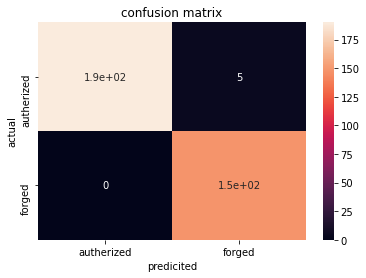

In [13]:
labels=['autherized','forged']
cm=confusion_matrix(actual_values,predicited_values,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('predicited')
ax.set_ylabel('actual')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)


In [16]:
tp,tn,fp,fn=confusion_matrix(y_test,y_prediction).ravel()
print(tn)
print(tp)

5
190


In [17]:
accuracy=(tn+tp)*100/(tp+tn+fp+fn)
print(accuracy)

56.85131195335277
